# The MET API
This session examines how to use the MET API in practice to gather and explore data. 

Through the session, we will:
- learn the components of an API request: the root, path, and endpoint
- practice with a few handy functions for examining request data
    - `type()` and `dir()`
- learn about a super important data type, the `dictionary` or `dict`, and how to access items within that structure.
- create more requests with that data
    - `f-strings`
- sort through request data using loops and conditionals
- transform our data into a dataframe, for doing simple data analysis

In [3]:
import requests

In [4]:
# the structure of our request: base_url, path, query

base_url = "https://collectionapi.metmuseum.org"
path = "/public/collection/v1/search"
query = "?q=woman"

## the anatomy of an API request:
- the *root* which consists of the base URL. 
   - https://collectionapi.metmuseum.org/
- the *path* which consists of a directory structure (file structure) where the data is held.
   - /public/collection/v1/objects
   - /public/collection/v1/departments 
   - /public/collection/v1/search
- the *parameter* or the *endpoint* which is the specific request. For example, a *query parameter* takes a search term following `?q=`, like: 
   - ?q=woman
   - ?q=van+gogh

A complete sample request that searches for the "woman" keyword would be:
- [`https://collectionapi.metmuseum.org/public/collection/v1/search?q=woman`](https://collectionapi.metmuseum.org/public/collection/v1/search?q=woman)
  

To read more about the MET API, see here: https://metmuseum.github.io/

In [5]:
# the request, saved to a variable

women = requests.get(base_url + path + query)

## inspecting objects: two functions: `type()` and `dir()`
Using `type()` and `dir()` to better understand our response data. The end goal is to sift through the data to discover interesting things.

In [6]:
# what type of object do we have?

type(women)

requests.models.Response

What can we do with a `Response` object? Spend a couple of minutes exploring the different methods.

In [7]:
dir(women)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [8]:
women.headers

{'Content-Type': 'application/json; charset=UTF-8', 'Vary': 'Origin', 'Access-Control-Allow-Origin': '*', 'X-Powered-By': 'ARR/3.0, ASP.NET', 'Date': 'Wed, 02 Oct 2024 20:09:51 GMT', 'Set-Cookie': 'visid_incap_1662004=uVSYCOfsT5ihXRAQPccXdI6o/WYAAAAAQUIPAAAAAAB9OMLnOK8ZMzkaxpXlJRd9; expires=Thu, 02 Oct 2025 07:14:32 GMT; HttpOnly; path=/; Domain=.metmuseum.org, incap_ses_5032_1662004=ayV7OP3ijkZpSedvhUHVRY6o/WYAAAAAPzUofptqjfsJnw4KsW0oLQ==; path=/; Domain=.metmuseum.org', 'X-CDN': 'Imperva', 'Content-Encoding': 'gzip', 'Transfer-Encoding': 'chunked', 'X-Iinfo': '18-16113300-16113329 NNYY CT(105 102 0) RT(1727899790040 62) q(0 0 0 -1) r(5 5) U12'}

In [9]:
women.raw

In [10]:
women.elapsed

datetime.timedelta(microseconds=708395)

In [11]:
women.ok

True

In [12]:
# what do these numbers mean?
women.content

b'{"total":13623,"objectIDs":[483873,207162,247582,283274,483877,685333,494305,481438,685319,489510,374147,515811,492892,486510,655796,204181,205376,193453,195502,193045,200897,208482,436173,483484,856709,548584,551500,253505,486423,467700,196462,436616,255391,251428,547202,486578,436121,436896,547334,437402,436002,254469,560727,436986,254597,253135,249222,253050,248132,437099,436295,232047,334249,486845,544210,252452,587759,249091,547257,255417,255275,248689,389226,839042,451943,437881,486742,464456,550970,436024,437879,544689,441024,247004,459192,437880,547860,437160,231788,436004,249223,371017,196452,555567,554337,437390,546746,547758,547476,459052,547820,543905,435711,566713,255697,568194,500194,468716,466235,550158,460424,337064,555761,254747,546047,552504,552505,12787,486209,467701,490013,489981,207128,207088,494051,484524,207175,252594,436170,488711,207051,207064,207063,449475,490037,207056,544183,208857,207045,196453,244801,252721,254436,252411,555755,247882,255027,241071,24835

In [74]:
women

<Response [200]>

## .json() to parse our response object

In [13]:
# why do we need to add parenthesis? 
parsed = women.json()

In [14]:
type(parsed)

dict

what is a `dict`? 2D data. We will look more closely soon.

In [15]:
dir(parsed)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [16]:
parsed.keys()

dict_keys(['total', 'objectIDs'])

We access items from a `dict` with brackets`[]`.

## accessing items from a `dict`
What is a `dictionary` anyway?

In [17]:
instructor = {
    'name': ['filipa calado', 'patrick smyth', 'stephen zweibel'],
    'age': [35, 37, 38],
    'degree': ['literature', 'literature', 'library science'],
    'job': ['digital scholarship specialist', 'startup', 'digital scholarship librarian']
}

In [18]:
# see the keys

instructor.keys()

dict_keys(['name', 'age', 'degree', 'job'])

In [19]:
# access items through brackets containing keys

instructor['name']

['filipa calado', 'patrick smyth', 'stephen zweibel']

### similar to a DataFrame in pandas

In [20]:
import pandas as pd
df = pd.DataFrame(instructor)

In [21]:
df

,name,age,degree,job
0,filipa calado,35,literature,digital scholarship specialist
1,patrick smyth,37,literature,startup
2,stephen zweibel,38,library science,digital scholarship librarian


In [22]:
# let's try with the first object

parsed.keys()

dict_keys(['total', 'objectIDs'])

We access items from a dict using brackets.

In [23]:
parsed['objectIDs']

[483873,
 207162,
 247582,
 283274,
 483877,
 685333,
 494305,
 481438,
 685319,
 489510,
 374147,
 515811,
 492892,
 486510,
 655796,
 204181,
 205376,
 193453,
 195502,
 193045,
 200897,
 208482,
 436173,
 483484,
 856709,
 548584,
 551500,
 253505,
 486423,
 467700,
 196462,
 436616,
 255391,
 251428,
 547202,
 486578,
 436121,
 436896,
 547334,
 437402,
 436002,
 254469,
 560727,
 436986,
 254597,
 253135,
 249222,
 253050,
 248132,
 437099,
 436295,
 232047,
 334249,
 486845,
 544210,
 252452,
 587759,
 249091,
 547257,
 255417,
 255275,
 248689,
 389226,
 839042,
 451943,
 437881,
 486742,
 464456,
 550970,
 436024,
 437879,
 544689,
 441024,
 247004,
 459192,
 437880,
 547860,
 437160,
 231788,
 436004,
 249223,
 371017,
 196452,
 555567,
 554337,
 437390,
 546746,
 547758,
 547476,
 459052,
 547820,
 543905,
 435711,
 566713,
 255697,
 568194,
 500194,
 468716,
 466235,
 550158,
 460424,
 337064,
 555761,
 254747,
 546047,
 552504,
 552505,
 12787,
 486209,
 467701,
 490013,
 4

In [24]:
type(parsed['objectIDs'])

list

In [25]:
parsed['objectIDs'][0]

483873

## reading documentation
What do you think this number means? Check out the "search" section on the MET API documentation: [https://metmuseum.github.io/#search](https://metmuseum.github.io/#search).

### individual challenge:
Reading the docs for the "Search" endpoint, play around with the different parameters. Try do searches for `isHighlight`, or `dateBegin and dateEnd`. You can layer parameters by using the `&` character in between them.

## using the "objects" endpoint
So far, we have been using the "search" endpoint for our requests. Now, we will create a new request using the "objects" endpoint". with data from the original request

Now we past the URL for "object" (rather than search), and we do it within an f-string, putting the variable "first" into curly brackets at the end. 

In [26]:
first = parsed['objectIDs'][0]

In [27]:
url = f"https://collectionapi.metmuseum.org/public/collection/v1/objects/{first}"

In [28]:
# running the request

first_object = requests.get(url)

In [29]:
# checking the resulting object

first_object

<Response [200]>

In [30]:
dir(first_object)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

look at the json for the first object

In [31]:
# all of the data about this object
# look at the URL! 

first_object.json()

{'objectID': 483873,
 'isHighlight': False,
 'accessionNumber': '1984.613.2',
 'accessionYear': '1984',
 'isPublicDomain': False,
 'primaryImage': '',
 'primaryImageSmall': '',
 'additionalImages': [],
 'constituents': [{'constituentID': 161817,
   'role': 'Artist',
   'name': 'Willem de Kooning',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500000974',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q132305',
   'gender': ''}],
 'department': 'Modern and Contemporary Art',
 'objectName': 'Painting',
 'title': 'Woman',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Willem de Kooning',
 'artistDisplayBio': 'American (born The Netherlands), Rotterdam 1904–1997 East Hampton, New York',
 'artistSuffix': '',
 'artistAlphaSort': 'De Kooning, Willem',
 'artistNationality': 'American, born The Netherlands',
 'artistBeginDate': '1904',
 'artistEndDate': '1997',
 'arti

In [32]:
# now we can save this first object to its own variable. 
# will make it easier to do more things to it!

first_json = first_object.json()

### individual practice:
Take a few minutes to inspect the dataset by using different keys.

Why do you think there's no gender?

In [33]:
# no result!

first_json['artistGender']

''

In [34]:
first_json['department']

'Modern and Contemporary Art'

In [35]:
first_json['culture']

''

## looping through our dataset

Now let's go back to the original list, and pull out all the info for the results. 

In [36]:
parsed['objectIDs']

[483873,
 207162,
 247582,
 283274,
 483877,
 685333,
 494305,
 481438,
 685319,
 489510,
 374147,
 515811,
 492892,
 486510,
 655796,
 204181,
 205376,
 193453,
 195502,
 193045,
 200897,
 208482,
 436173,
 483484,
 856709,
 548584,
 551500,
 253505,
 486423,
 467700,
 196462,
 436616,
 255391,
 251428,
 547202,
 486578,
 436121,
 436896,
 547334,
 437402,
 436002,
 254469,
 560727,
 436986,
 254597,
 253135,
 249222,
 253050,
 248132,
 437099,
 436295,
 232047,
 334249,
 486845,
 544210,
 252452,
 587759,
 249091,
 547257,
 255417,
 255275,
 248689,
 389226,
 839042,
 451943,
 437881,
 486742,
 464456,
 550970,
 436024,
 437879,
 544689,
 441024,
 247004,
 459192,
 437880,
 547860,
 437160,
 231788,
 436004,
 249223,
 371017,
 196452,
 555567,
 554337,
 437390,
 546746,
 547758,
 547476,
 459052,
 547820,
 543905,
 435711,
 566713,
 255697,
 568194,
 500194,
 468716,
 466235,
 550158,
 460424,
 337064,
 555761,
 254747,
 546047,
 552504,
 552505,
 12787,
 486209,
 467701,
 490013,
 4

In [37]:
ids = parsed['objectIDs']

In [39]:
type(ids)

list

In [40]:
len(ids)

13623

## remember loops?

In [41]:
# remember we can slice our list, to get just the first ten

for item in ids[:10]:
    print(item)

483873
207162
247582
283274
483877
685333
494305
481438
685319
489510


### Group Challenge: create a new request, passing the first ten objects
Remember how to make a new request, using an `f-string`

`url = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{item}`

Now, add that request to your loop so you make a new request for the first ten items on the list of object IDs. Once you get the response, parse it (with `json()`) and append that item to a new list. 

In [46]:
first_ten = []
for item in ids[:10]:
    # passing the objectID variable into the URL
    url = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{item}'
    # grabbing our response for that object
    response = requests.get(url)
    # parsing our response with json
    parsed = response.json()
    # appending the response to our new list
    first_ten.append(parsed)

In [48]:
# because we already know the first, let's check the last item

first_ten[-1]

{'objectID': 489510,
 'isHighlight': False,
 'accessionNumber': '66.75.2',
 'accessionYear': '1966',
 'isPublicDomain': False,
 'primaryImage': '',
 'primaryImageSmall': '',
 'additionalImages': [],
 'constituents': [{'constituentID': 161734,
   'role': 'Artist',
   'name': 'Alexander Calder',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500007824',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q151580',
   'gender': ''}],
 'department': 'Modern and Contemporary Art',
 'objectName': 'Sculpture',
 'title': 'Woman',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Alexander Calder',
 'artistDisplayBio': 'American, Philadelphia, Pennsylvania 1898–1976 New York',
 'artistSuffix': '',
 'artistAlphaSort': 'Calder, Alexander',
 'artistNationality': 'American',
 'artistBeginDate': '1898',
 'artistEndDate': '1976',
 'artistGender': '',
 'artistWikidata_URL': 'https://

now guess what type of data we have for `first_ten`?

In [49]:
type(first_ten)

list

In [53]:
for item in first_ten:
    print(item['artistDisplayName'])

Willem de Kooning
Royal Porcelain Manufactory, Naples
Woman Painter
Man Ray
Willem de Kooning


KeyError: 'artistDisplayName'

let's look at some of the values

In [50]:
for item in first_ten:
    print(item['title'])

Woman
Woman
Terracotta lekythos (oil flask)
Woman
Woman


KeyError: 'title'

There's another way to grab items from a `dict`, using the `get()` method.

In [54]:
dir(item)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [54]:
for item in first_ten:
    if item.get('artistDisplayName'):
        print(item['artistDisplayName'])

NameError: name 'first_ten' is not defined

In [55]:
for item in first_ten:
    title = item.get('artistDisplayName')
    print(title)

Willem de Kooning
Royal Porcelain Manufactory, Naples
Woman Painter
Man Ray
Willem de Kooning
None
Joan Miró
Willem de Kooning
None
Alexander Calder


## about "women"
Let's make our dataset bigger, with 100 works.

In [ ]:
first_hundred = []
for item in ids[:100]:
    url = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{item}'
    response = requests.get(url)
    parsed = response.json()
    first_hundred.append(parsed)

In [ ]:
# combine get() with conditional to get rid of the None's

for item in first_hundred:
    if item.get('artistDisplayName'):
        print(item['artistDisplayName'])

In [61]:
# or, if we want to show the value, even if empty or None

for item in first_hundred:
    gender = item.get('artistGender')
    print(gender)






None


None





None









None





































Female














Female



Female




















Let's use `get()` combined with `f-strings` to print both the name and the gender.

In [56]:
# why do you think we see only female?

for item in first_hundred:
    if item.get('artistDisplayName'):
        print(f"artist name: {item['artistDisplayName']}")
        print(f"artist gender: {item['artistGender']}")

artist name: Willem de Kooning
artist gender: 
artist name: Royal Porcelain Manufactory, Naples
artist gender: 
artist name: Woman Painter
artist gender: 
artist name: Man Ray
artist gender: 
artist name: Willem de Kooning
artist gender: 
artist name: Joan Miró
artist gender: 
artist name: Willem de Kooning
artist gender: 
artist name: Alexander Calder
artist gender: 
artist name: Harold Anchel
artist gender: 
artist name: Malick Sidibé
artist gender: 
artist name: Joan Miró
artist gender: 
artist name: Joan Miró
artist gender: 
artist name: Lorenzo Mosca
artist gender: 
artist name: Bow Porcelain Factory
artist gender: 
artist name: Royal Porcelain Manufactory, Berlin
artist gender: 
artist name: Vienna
artist gender: 
artist name: Edgar Degas
artist gender: 
artist name: Gaston Lachaise
artist gender: 
artist name: Fernand Léger
artist gender: 
artist name: Edgar Degas
artist gender: 
artist name: Frans Hals
artist gender: 
artist name: Jean Dubuffet
artist gender: 
artist name: Edga

## saving to DataFrame

In [60]:
# look again at the first object
first_hundred[0]

{'objectID': 483873,
 'isHighlight': False,
 'accessionNumber': '1984.613.2',
 'accessionYear': '1984',
 'isPublicDomain': False,
 'primaryImage': '',
 'primaryImageSmall': '',
 'additionalImages': [],
 'constituents': [{'constituentID': 161817,
   'role': 'Artist',
   'name': 'Willem de Kooning',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500000974',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q132305',
   'gender': ''}],
 'department': 'Modern and Contemporary Art',
 'objectName': 'Painting',
 'title': 'Woman',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Willem de Kooning',
 'artistDisplayBio': 'American (born The Netherlands), Rotterdam 1904–1997 East Hampton, New York',
 'artistSuffix': '',
 'artistAlphaSort': 'De Kooning, Willem',
 'artistNationality': 'American, born The Netherlands',
 'artistBeginDate': '1904',
 'artistEndDate': '1997',
 'arti

In [62]:
# let's get a bunch of this data into lists

titles = []
names = []
genders = []
depts = []
countries = []
urls = []

for item in first_hundred:
    title = item.get('artistGender')
    titles.append(title)
    name = item.get('artistDisplayName')
    names.append(name)
    gender = item.get('artistGender')
    genders.append(gender)
    dept = item.get('department')
    depts.append(dept)
    country = item.get('country')
    countries.append(country)
    url = item.get('objectURL')
    urls.append(url)

In [64]:
countries

['',
 '',
 '',
 '',
 '',
 None,
 '',
 '',
 None,
 '',
 '',
 'Mali',
 '',
 '',
 None,
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 'Egypt',
 'Egypt',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Egypt',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'France',
 '',
 'Egypt',
 '',
 'Egypt',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Turkey',
 '',
 '',
 'Byzantine Egypt',
 'Egypt',
 '',
 '',
 'Egypt',
 '',
 '',
 '',
 '',
 'Egypt',
 '',
 '',
 '',
 '',
 '',
 '',
 'Egypt',
 'Egypt',
 '',
 'Egypt',
 'Egypt',
 'Egypt',
 '',
 'Egypt',
 'Egypt',
 '',
 'Egypt',
 '',
 'Egypt',
 '',
 '',
 '',
 'Egypt']

In [65]:
depts

['Modern and Contemporary Art',
 'European Sculpture and Decorative Arts',
 'Greek and Roman Art',
 'Photographs',
 'Modern and Contemporary Art',
 None,
 'Modern and Contemporary Art',
 'Modern and Contemporary Art',
 None,
 'Modern and Contemporary Art',
 'Drawings and Prints',
 'The Michael C. Rockefeller Wing',
 'Modern and Contemporary Art',
 'Modern and Contemporary Art',
 None,
 'European Sculpture and Decorative Arts',
 'European Sculpture and Decorative Arts',
 'European Sculpture and Decorative Arts',
 'European Sculpture and Decorative Arts',
 'European Sculpture and Decorative Arts',
 'European Sculpture and Decorative Arts',
 'European Sculpture and Decorative Arts',
 'European Paintings',
 'Modern and Contemporary Art',
 None,
 'Egyptian Art',
 'Egyptian Art',
 'Greek and Roman Art',
 'Modern and Contemporary Art',
 'Medieval Art',
 'European Sculpture and Decorative Arts',
 'European Paintings',
 'Greek and Roman Art',
 'Greek and Roman Art',
 'Egyptian Art',
 'Modern an

In [66]:
urls

['https://www.metmuseum.org/art/collection/search/483873',
 'https://www.metmuseum.org/art/collection/search/207162',
 'https://www.metmuseum.org/art/collection/search/247582',
 'https://www.metmuseum.org/art/collection/search/283274',
 'https://www.metmuseum.org/art/collection/search/483877',
 None,
 'https://www.metmuseum.org/art/collection/search/494305',
 'https://www.metmuseum.org/art/collection/search/481438',
 None,
 'https://www.metmuseum.org/art/collection/search/489510',
 'https://www.metmuseum.org/art/collection/search/374147',
 'https://www.metmuseum.org/art/collection/search/515811',
 'https://www.metmuseum.org/art/collection/search/492892',
 'https://www.metmuseum.org/art/collection/search/486510',
 None,
 'https://www.metmuseum.org/art/collection/search/204181',
 'https://www.metmuseum.org/art/collection/search/205376',
 'https://www.metmuseum.org/art/collection/search/193453',
 'https://www.metmuseum.org/art/collection/search/195502',
 'https://www.metmuseum.org/art/col

## data anlaysis with pandas

In [67]:
import pandas as pd

In [68]:
df = pd.DataFrame({
    'title': titles,
    'name': names,
    'gender': genders,
    'department': depts,
    'country': countries,
    'link': urls
})

In [69]:
df

,title,name,gender,department,country,link
0,,Willem de Kooning,,Modern and Contemporary Art,,https://www.metmuseum.org/art/collection/searc...
1,,"Royal Porcelain Manufactory, Naples",,European Sculpture and Decorative Arts,,https://www.metmuseum.org/art/collection/searc...
2,,Woman Painter,,Greek and Roman Art,,https://www.metmuseum.org/art/collection/searc...
3,,Man Ray,,Photographs,,https://www.metmuseum.org/art/collection/searc...
4,,Willem de Kooning,,Modern and Contemporary Art,,https://www.metmuseum.org/art/collection/searc...
...,...,...,...,...,...,...
95,,,,Egyptian Art,Egypt,https://www.metmuseum.org/art/collection/searc...
96,,Pablo Picasso,,Modern and Contemporary Art,,https://www.metmuseum.org/art/collection/searc...
97,,,,The Cloisters,,https://www.metmuseum.org/art/collection/searc...
98,,Master of Rimini,,Medieval Art,,https://www.metmuseum.org/art/collection/searc...


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       96 non-null     object
 1   name        96 non-null     object
 2   gender      96 non-null     object
 3   department  96 non-null     object
 4   country     96 non-null     object
 5   link        96 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


In [71]:
df.value_counts('department')

department
Egyptian Art                              21
European Paintings                        18
Greek and Roman Art                       18
Modern and Contemporary Art               13
European Sculpture and Decorative Arts    12
Drawings and Prints                        5
Medieval Art                               3
Robert Lehman Collection                   2
Islamic Art                                1
Photographs                                1
The Cloisters                              1
The Michael C. Rockefeller Wing            1
Name: count, dtype: int64

<Axes: ylabel='department'>

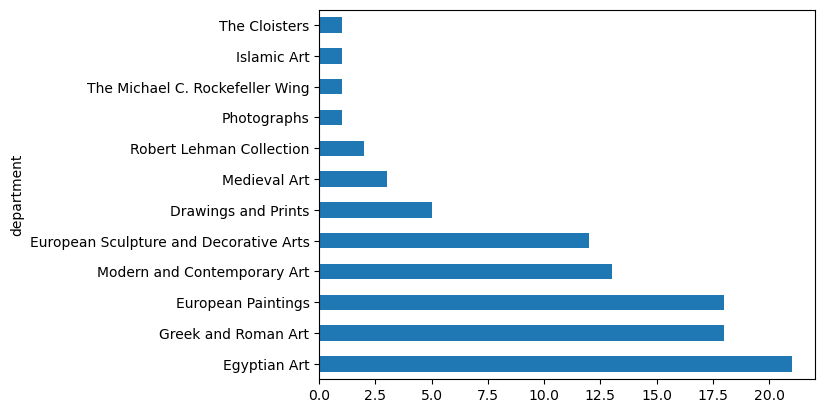

In [72]:
df.department.value_counts().plot(kind = 'barh')

<Axes: ylabel='count'>

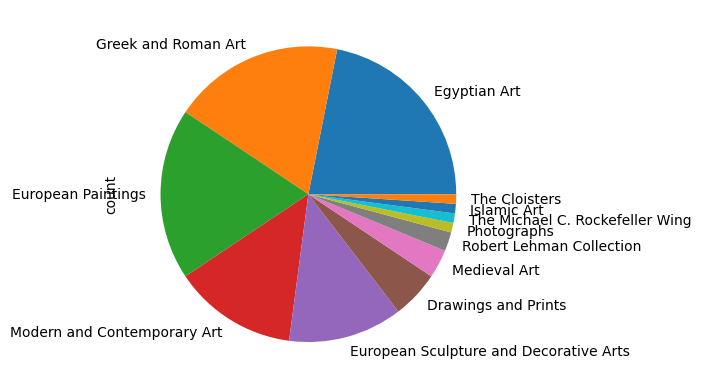

In [73]:
df.department.value_counts().plot(kind = 'pie')